In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t
from scipy.misc import derivative
import scipy
import warnings

warnings.filterwarnings('ignore')

행렬식은 선형 변환의 기하학적 특성을 나타내는 중요한 개념 중 하나

- 우선, 선형 변환은 벡터 공간에서 하나의 벡터를 다른 벡터로 옮기는 함수입니다. 이 때, 선형 변환은 벡터 공간의 모양을 변경시키지 않습니다.

- 행렬식은 이러한 선형 변환의 기하학적 특성 중 하나인 스케일링 및 회전을 나타냅니다. 스케일링은 벡터를 크기만 변경시키는 변환을 의미하며, 회전은 벡터를 방향을 변경시키는 변환을 의미합니다.

- 행렬식은 선형 변환을 수행하는 행렬의 크기 변화를 나타내며, 변환 후의 공간의 부피를 결정합니다. 행렬식이 1보다 크면 공간이 확대되고, 1보다 작으면 공간이 축소됩니다. 또한, 행렬식이 0이면 선형 변환은 벡터 공간의 모양을 변경시키지 않습니다.

- 2차원 평면에서 2배 확대하는 선형 변환을 수행하는 행렬의 행렬식은 2이며, 90도 회전하는 선형 변환을 수행하는 행렬의 행렬식은 -1입니다. 이러한 기하학적 의미는 컴퓨터 그래픽스, 물리학, 공학 등 다양한 분야에서 활용됩니다.
    - 90도 회전하는 선형 변환을 수행하는 행렬의 행렬식이 -1이라는 것은, 이 변환이 공간의 부피를 음수로 변경시킨다는 의미
    - 이러한 회전 변환이 적용되면, 양의 방향과 반대 방향으로 공간이 뒤집히게 되어 음수의 부피가 생기는 것
    -  정사각형을 90도 회전하는 선형 변환을 적용하면, 정사각형은 기존과는 반대 방향으로 뒤집히게 됩니다. 이렇게 뒤집힌 정사각형은 양의 방향으로는 측정할 수 없는 음수의 부피를 가지게 됩니다.
    
 행렬식의 기하학적 의미 : https://angeloyeo.github.io/2019/08/06/determinant.html

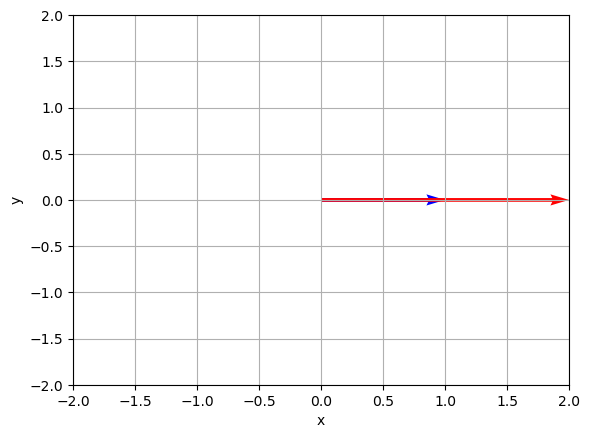

In [2]:
v = np.array([1, 0])

A = np.array([[2, 0], [0,1]])

Av = np.dot(A, v)

fig, ax = plt.subplots()

# 변환 전 벡터 그리기
ax.quiver([0], [0], v[0], v[1], color = 'b', angles = 'xy', scale_units = 'xy', scale = 1)

# 변환 후 벡터 그리기
ax.quiver([0], [0], Av[0], Av[1], color = 'r', angles = 'xy', scale_units = 'xy', scale = 1)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()

plt.show()

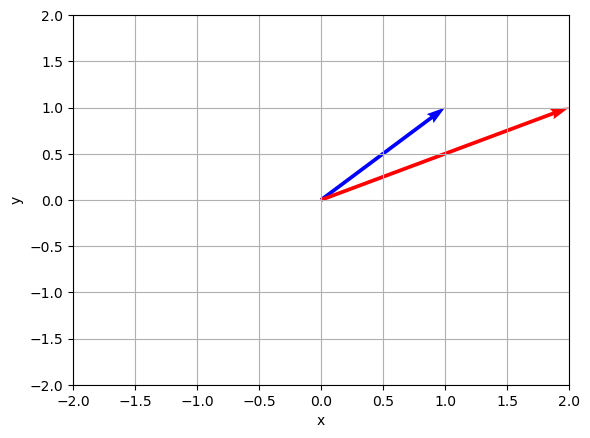

In [3]:
v = np.array([1, 1])

A = np.array([[2, 0], [0,1]])

Av = np.dot(A, v)

fig, ax = plt.subplots()

# 변환 전 벡터 그리기
ax.quiver([0], [0], v[0], v[1], color = 'b', angles = 'xy', scale_units = 'xy', scale = 1)

# 변환 후 벡터 그리기
ax.quiver([0], [0], Av[0], Av[1], color = 'r', angles = 'xy', scale_units = 'xy', scale = 1)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()

plt.show()

In [4]:
A = np.array([[2, 0], [0, 1]])
print(A)

det_A = np.linalg.det(A)
print(det_A)

[[2 0]
 [0 1]]
2.0


np.dot과 np.matmul의 차이

- np.dot() 함수는 두 개의 배열을 인수로 받아서 내적(dot product)을 반환합니다. 내적은 두 배열의 대응하는 요소끼리 곱한 값을 모두 더한 것입니다. 즉, 두 배열이 1D 배열인 경우에는 벡터의 내적을 계산하고, 두 배열이 2D 배열인 경우에는 행렬 곱셈을 계산합니다. 이때 두 배열의 차원 수가 다르면 np.dot() 함수는 인수를 전치(transpose)하여 계산

- np.matmul() 함수도 두 개의 배열을 인수로 받아서 행렬 곱셈을 반환합니다. 그러나 np.matmul() 함수는 3D 이상의 배열에 대해서도 계산이 가능합니다. 이때 np.matmul() 함수는 마지막 두 차원에 대해서만 행렬 곱셈을 수행

- np.matmul() 함수는 첫 번째 배열의 마지막 차원(4)과 두 번째 배열의 두 번째 차원(4)을 곱하여 (2, 3, 3) 크기의 배열을 반환합니다.
따라서, np.dot() 함수는 두 배열이 1D 배열이거나 2D 배열인 경우에 사용하고, np.matmul() 함수는 두 배열이 2D 이상인 경우에 사용

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=cjh226&logNo=221356884894

In [5]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8], [9, 10], [11, 12]])

print(np.dot(a, b), '\n')
print(np.matmul(a, b))

[[ 58  64]
 [139 154]] 

[[ 58  64]
 [139 154]]


In [6]:
a = np.random.rand(2, 3, 4)
b = np.random.rand(2, 4, 3)

print('dot','\n', np.dot(a, b), '\n')
print('matmul', '\n', np.matmul(a, b))

dot 
 [[[[1.40509858 0.81520249 1.30837618]
   [0.67406583 0.71928011 0.74072181]]

  [[1.4781328  0.79002418 1.54411248]
   [0.61321297 0.84795185 0.72027818]]

  [[1.01040393 0.52726975 1.07182842]
   [0.51363717 0.60115261 0.51118746]]]


 [[[1.37437391 0.74047415 1.27465648]
   [0.68815856 0.73857098 0.76955189]]

  [[0.76602253 0.23988794 1.02014614]
   [0.43159276 0.62852605 0.39575286]]

  [[1.71544801 1.1169156  1.08871892]
   [0.6067842  0.60805684 1.03639758]]]] 

matmul 
 [[[1.40509858 0.81520249 1.30837618]
  [1.4781328  0.79002418 1.54411248]
  [1.01040393 0.52726975 1.07182842]]

 [[0.68815856 0.73857098 0.76955189]
  [0.43159276 0.62852605 0.39575286]
  [0.6067842  0.60805684 1.03639758]]]


In [7]:
# 첫번째 배열의 마지막 차원(4)과 두번째 배열의 두번째 차원(4)를 곱하여
# (2, 3, 3) 크기의 배열을 반환

a = np.random.rand(2, 3, 4)
b = np.random.rand(2, 4, 3)

print('matmul', '\n', np.matmul(a, b))

matmul 
 [[[1.44123248 1.55990459 1.57933313]
  [1.11108573 1.12912303 1.27085868]
  [1.32919224 1.36957244 1.47533848]]

 [[0.24704944 0.45148379 0.77519356]
  [0.45177693 0.85045484 1.3847075 ]
  [0.50729009 0.81155862 1.85552568]]]


### 과제

5차원 배열 2개를 생성하여 행열곱을 구하세요

In [8]:
a = np.random.rand(2, 5, 4, 1, 2)
b = np.random.rand(1, 5, 4, 2, 3)

print(np.matmul(a, b))

[[[[[0.2795575  0.2410328  0.2129657 ]]

   [[0.36116164 1.07184471 0.34661208]]

   [[0.68512721 0.30325052 0.29444004]]

   [[0.4099186  0.25267329 0.33435941]]]


  [[[0.33346296 0.44857199 0.85309159]]

   [[0.31402067 0.45193971 0.0069473 ]]

   [[0.26082931 0.37701963 0.30156042]]

   [[0.67294476 0.67866068 0.2630667 ]]]


  [[[0.22657159 0.4203778  0.77264345]]

   [[0.52952715 0.37184831 0.71806993]]

   [[0.43520006 0.1462266  0.78620215]]

   [[0.91309259 0.47686832 0.67794537]]]


  [[[0.75075512 0.89961826 1.22969977]]

   [[0.23988416 0.36717083 0.43157253]]

   [[0.78518529 0.97977581 0.931536  ]]

   [[0.72497066 0.66830424 0.95786365]]]


  [[[0.73723627 0.29206134 0.25457042]]

   [[0.20289875 0.15876672 0.4160416 ]]

   [[0.49645978 0.4867902  0.29740056]]

   [[0.60416878 0.79164694 0.4465087 ]]]]



 [[[[0.20209279 0.22588561 0.12619307]]

   [[0.08649096 0.48848718 0.13877897]]

   [[1.04791354 0.51756751 0.34419685]]

   [[0.55619391 0.55830845 0.65264662]]]


  

In [9]:
# 함수 정의

f = {
    1 : 2,
    2 : 4,
    3 : 6,
    4 : 8,
    5 : 10
    }

f[1]

2

In [10]:
def f(x) :
    
    return 2 * x

x = 10
y = f(x)

print(f'f({x}) = {y}')

f(10) = 20


In [11]:
# 부호 함수 : 양수이면 1 음수이면 -1 0이면 0

np.sign(-0.0001), np.sign(0), np.sign(0.0001)

(-1.0, 0, 1.0)

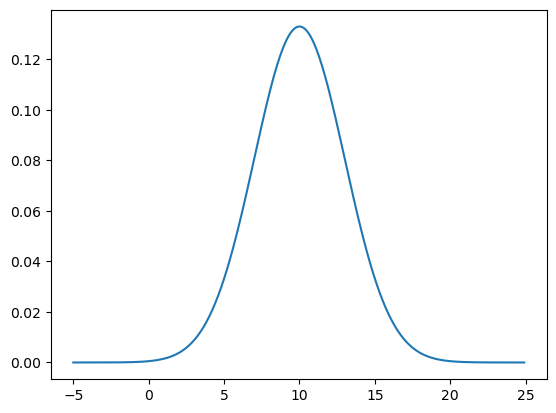

In [12]:
# 평균이 10 표준편차가 3인 정규분포의 확률밀도 함수를 그래프로 표현

x = np.arange(-5, 25, 0.1)

mu = 10
sigma = 3

plt.plot(x, stats.norm.pdf(x, loc = mu, scale = sigma))

plt.show()

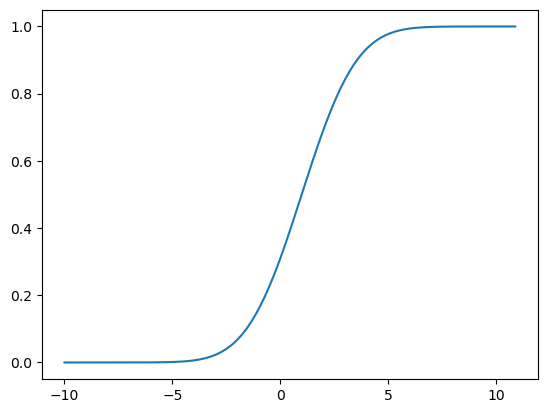

In [13]:
# 평균이 1 표준편차가 2인 정규분포의 누적분포 함수를 그래프로 표현

x = np.arange(-10, 11, 0.1)

mu = 1
sigma = 2

plt.plot(x, stats.norm.cdf(x, loc = mu, scale = sigma))

plt.show()

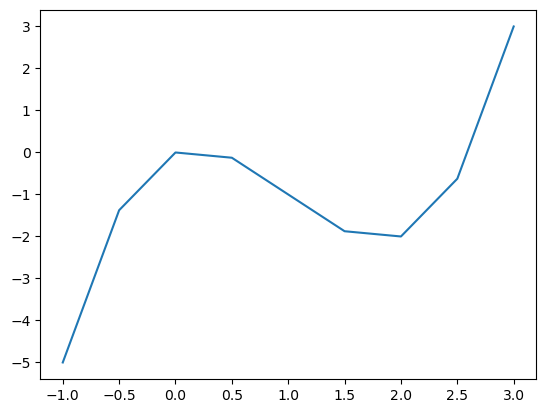

In [14]:
def f(x) :
    
    return x ** 3 - 3 * x **2 + x

x = np.linspace(-1, 3, 9)
y = f(x)

plt.plot(x, y)

plt.show()

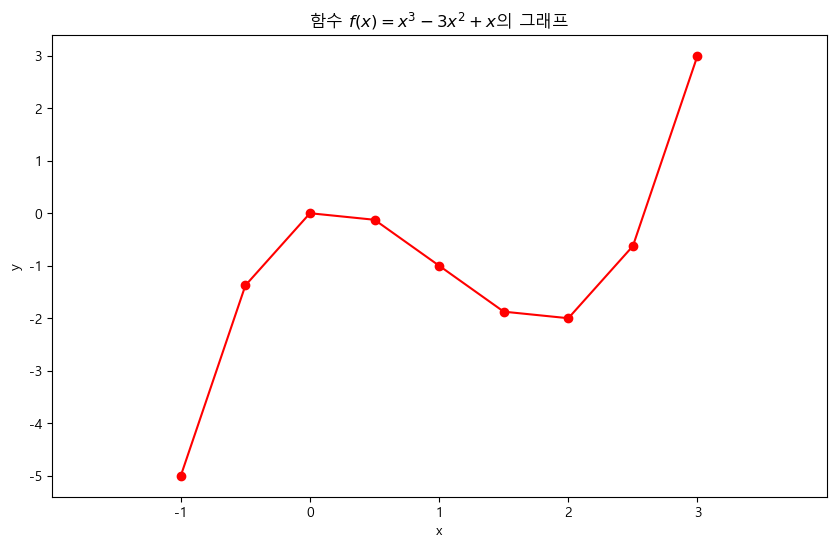

In [15]:
mpl.rc('font', family = 'Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10,6))
plt.plot(x, y, 'ro-')

plt.xlim(-2, 4)
plt.title('함수 $f(x) = x^3 - 3x^2 + x$의 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))

plt.show()

### 과제

위의 그래프를  x,y 구간을 400으로 조밀하게 변경하여 다시 표현

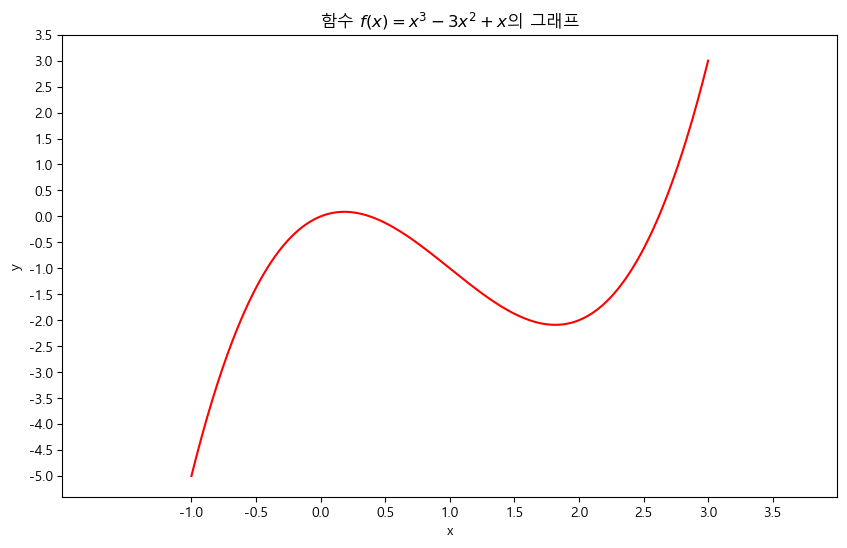

In [16]:
x = np.linspace(-1, 3, 400)
y = f(x)

plt.figure(figsize = (10,6))
plt.plot(x, y, 'r-')

plt.xlim(-2, 4)
plt.title('함수 $f(x) = x^3 - 3x^2 + x$의 그래프')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-1, 4, 0.5))
plt.yticks(np.arange(-5, 4, 0.5))

plt.show()

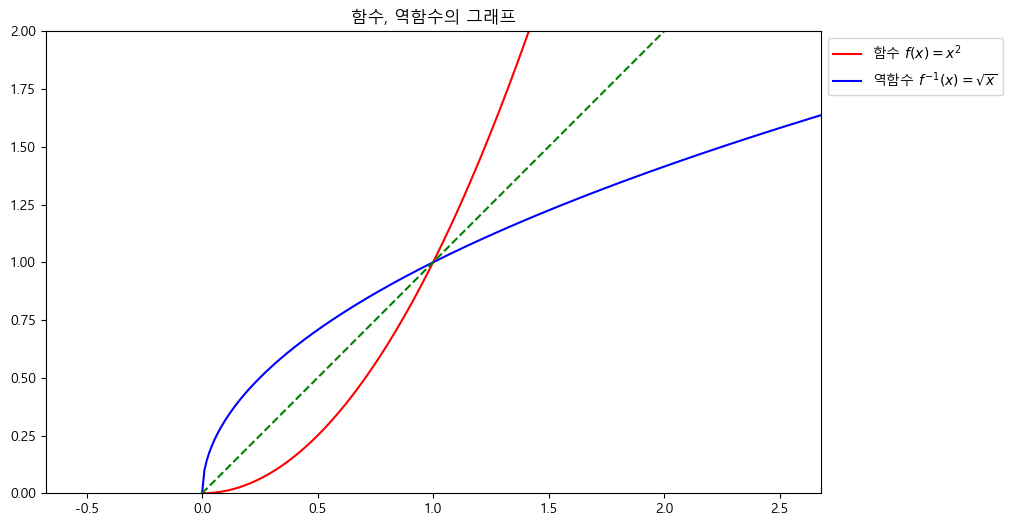

In [17]:
# 역함수 : 어떤 함수의 입력 / 출력 간 관계와 정반대의 입출력 관계를 갖는  함수
# 원래의 함수에서 x축과 y 축이 바뀐 것이므로 y = x가 나타내는 직선을 대칭축으로 대칭인 함수의 그래프

def f1(x) : 
    
    return x ** 2

def f1inv(x) :
    
    return np.sqrt(x)

x = np.linspace(0, 3, 300)

plt.figure(figsize = (10, 6))

plt.plot(x, f1(x), 'r-', label = '함수 $f(x) = x^2$')
plt.plot(x, f1inv(x), 'b-', label = '역함수 $f^{-1}(x) = \sqrt{x}$')
plt.plot(x, x, 'g--')

plt.axis('equal')
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
plt.title('함수, 역함수의 그래프')

plt.show()

함수의 역함수를 구하는 과정

- 원래 함수의 x 와 y 를 바꿔준다
- 바뀐 함수를 y에 대해서 푼 후  x로 정리한다

### 과제

다음 함수의 역함수를 구하고 그래프로 표현하세요

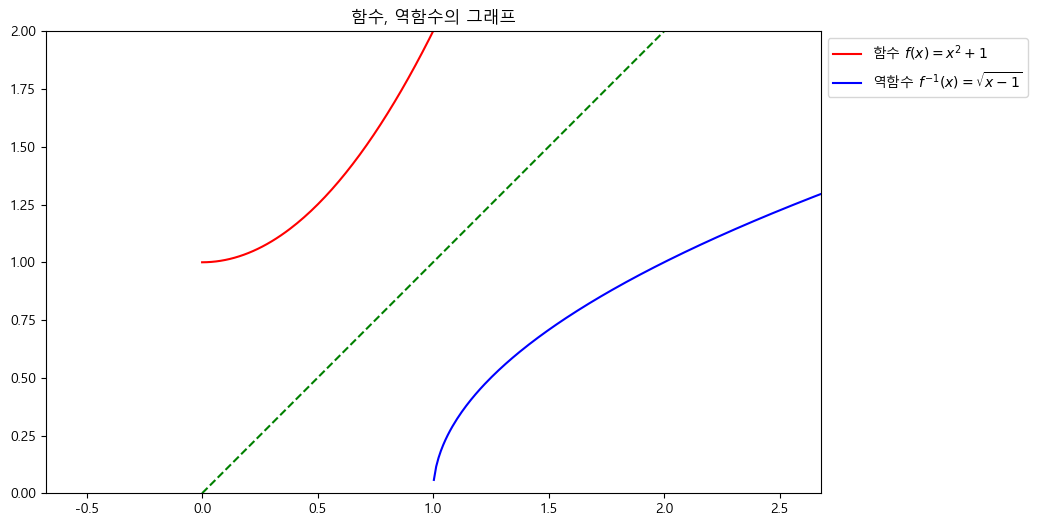

In [18]:
def f(x) :
    
    return (x ** 2 + 1)

def finv(x) :
    
    return np.sqrt((x - 1))

x = np.linspace(0, 3, 300)

plt.figure(figsize = (10, 6))

plt.plot(x, f(x), 'r-', label = '함수 $f(x) = x^2 + 1$')
plt.plot(x, finv(x), 'b-', label = '역함수 $f^{-1}(x) = \sqrt{x - 1}$')
plt.plot(x, x, 'g--')

plt.axis('equal')
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
plt.title('함수, 역함수의 그래프')

plt.show()

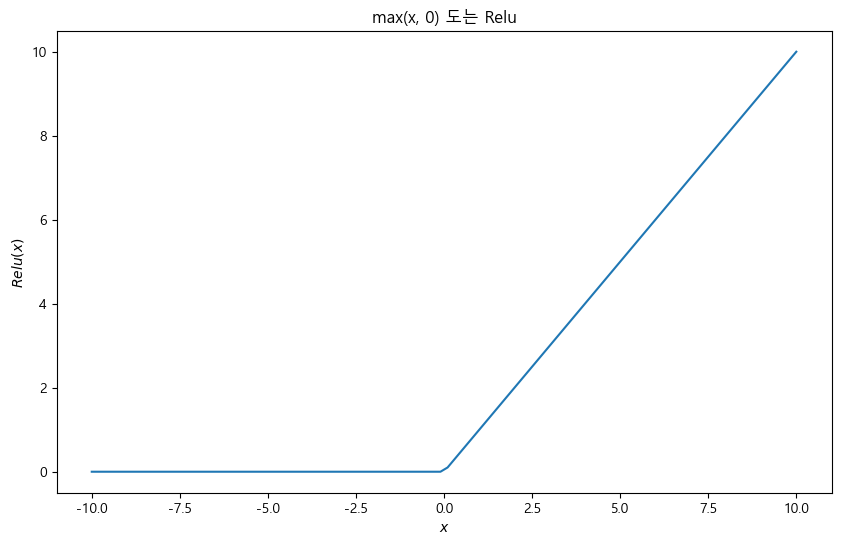

In [19]:
# Relu - 활성화 함수

xx = np.linspace(-10, 10, 100)

plt.figure(figsize = (10, 6))

plt.plot(xx, np.maximum(xx, 0))
plt.title('max(x, 0) 도는 Relu')
plt.xlabel('$x$')
plt.ylabel('$Relu(x)$')

plt.show()

### 지수 함수

- 정해진 어떤 값을 입력값으로 거듭제곱하여 출력을 구하는 함수
- 거듭제곱을 할 때 아래에 있는 수를 밑이라고 하며 밑을 오일러 수 e(약 2.718)로 하여 거듭제곱하는 함수를 지수 함수라고 한다
- $y = e^x$, y = exp(x) = exp x로 표시
- 로그함수의 밑으로 자연로그 함수(ln)을 사용하는데 이때 밑이 오일러 상수 e 이다

In [20]:
import math

print(math.e)

2.718281828459045


In [21]:
# 로그 함수의 및이 e인 경우 

x = 10
y = math.log(x)

y

2.302585092994046

In [22]:
# 로그 함수의 및이 다른 수인 경우 

x = 10
base = 10
y = math.log(x, base)

y

1.0

In [23]:
print(np.exp(-10))
print(np.exp(-1))
print(np.exp(-0.1))
print(np.exp(-0))
print(np.exp(0.1))
print(np.exp(1))
print(np.exp(10))

4.5399929762484854e-05
0.36787944117144233
0.9048374180359595
1.0
1.1051709180756477
2.718281828459045
22026.465794806718


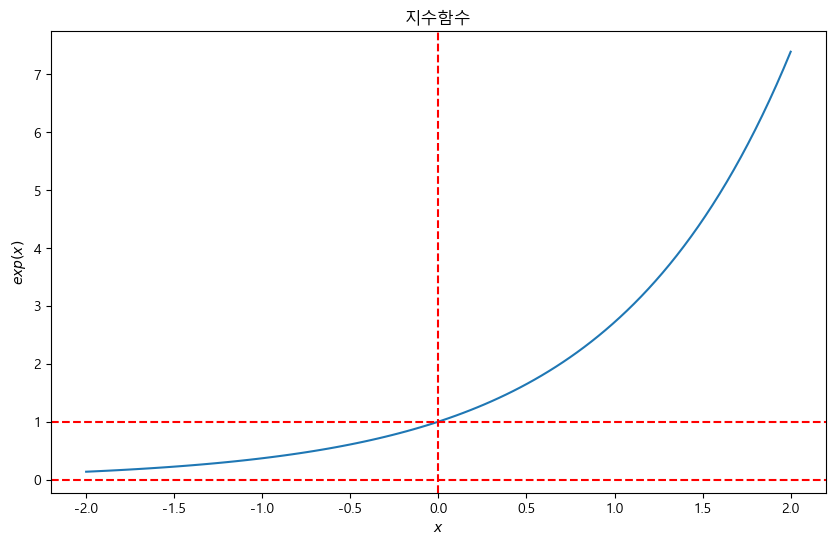

In [24]:
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)

plt.figure(figsize = (10,6))

plt.title('지수함수')
plt.plot(xx, yy)
plt.axhline(1, c = 'r', ls = '--')
plt.axhline(0, c = 'r', ls = '--')
plt.axvline(0, c = 'r', ls = '--')
plt.xlabel('$x$')
plt.ylabel('$exp(x)$')

plt.show()

In [25]:
print(np.exp(-2))

0.1353352832366127


### 과제

로그함수를 시각화하여 표현하세요

In [26]:
np.log(1)

0.0

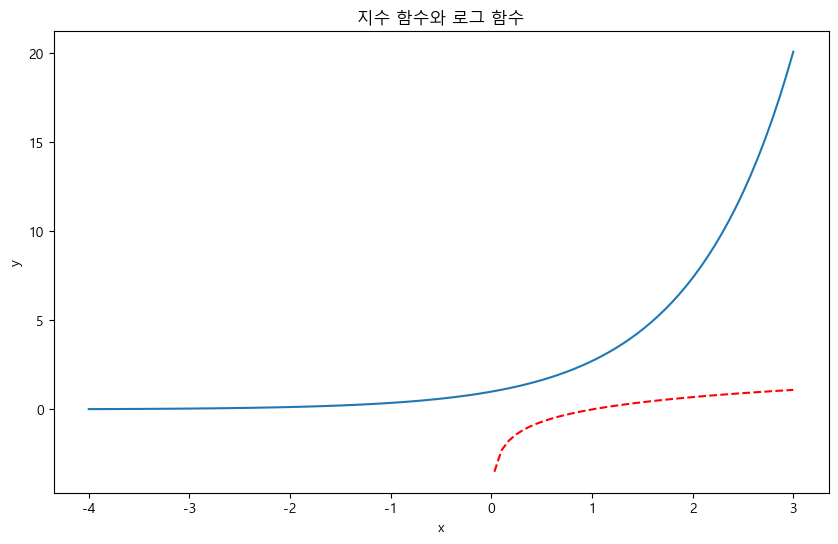

In [44]:
xx = np.linspace(-4, 3, 100)
yy = np.exp(xx)

xx2 = np.linspace(-4, 3, 100)
yy2 = np.log(xx2)

plt.figure(figsize=(10, 6))

plt.plot(xx, yy)
plt.plot(xx2, yy2, 'r--')

plt.title('지수 함수와 로그 함수')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 과제 다음을 수행하세요

- np.arange(9)로 구성된 정방행열
- 주대각선 원소가 [1, 2, 3] 인 대각 정방행열
- 3행 3열로 구성된 항등행열
- 3행 1열로 구성된 영벡터

In [28]:
a = np.arange(9).reshape(3,3)
print(a, '\n')

b = np.diag([1, 2, 3])
print(b, '\n')

c = np.eye(3)
print(c, '\n')

d = np.zeros(3).reshape(3, 1)
print(d)

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[1 0 0]
 [0 2 0]
 [0 0 3]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[0.]
 [0.]
 [0.]]


### 과제 mt1 행열에 대하여 다음을 수행하세요

- 역행열 mt2를 구하고
- mt1 와 mt2를 내적하여 단위 행열을 출력

In [29]:
np.random.seed(0)

mt1 = np.random.randint(1, 4, size = (3, 3))
print(mt1, '\n')

mt2 = np.linalg.inv(mt1)
print(mt2, '\n')

print(mt1.dot(mt2))

[[1 2 1]
 [2 2 3]
 [1 3 1]] 

[[ 7. -1. -4.]
 [-1.  0.  1.]
 [-4.  1.  2.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 과제 행열식의 기하학적 성질은 부피를 의미하며 2 x 2 행열 a의 행열식은 일종의 넓이로 이해할 수 있다

- [[2, 0], [0, 2] 배열에 대하여 행열식을 이용하여 면적을 구하세요]

In [30]:
a = np.array([[2, 0], [0, 2]])

print(np.linalg.det(a))

4.0


## 미분

최적화를 하기 위해서는 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지를 정량적으로 알아야 하며 이러한 과정이 미분이다.

함수의 그래프상에 있는 한 점을 줌심으로 그래프를 무한히 확대해 보면 그래프의 모양이 직선에 가까워지는데 이때의 기울기를 미분이라고 한다. 이 직선은 같은 점을 기준으로 그린 그래프의 접선과 같다.

신경망에서 미분의 필요성 : https://gggggeun.tistory.com/120           https://gggggeun.tistory.com/121

미분 개념 : https://www.youtube.com/watch?v=kMZ3RJEaLE4

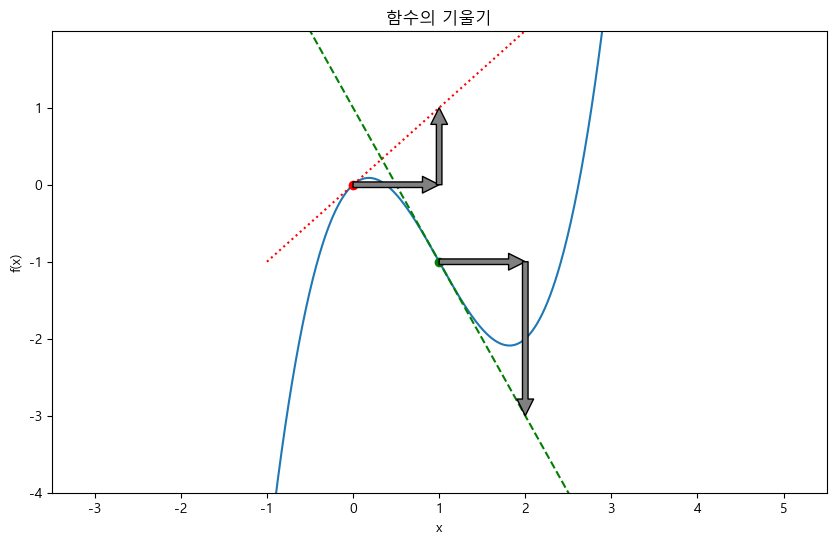

In [31]:
def f(x):
    return x ** 3 - 3 * x ** 2 + x

x = np.linspace(-1, 3, 400)
y = f(x)
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3 * 1 ** 2 - 6 * 1 + 1) * (x - 1) - 1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()

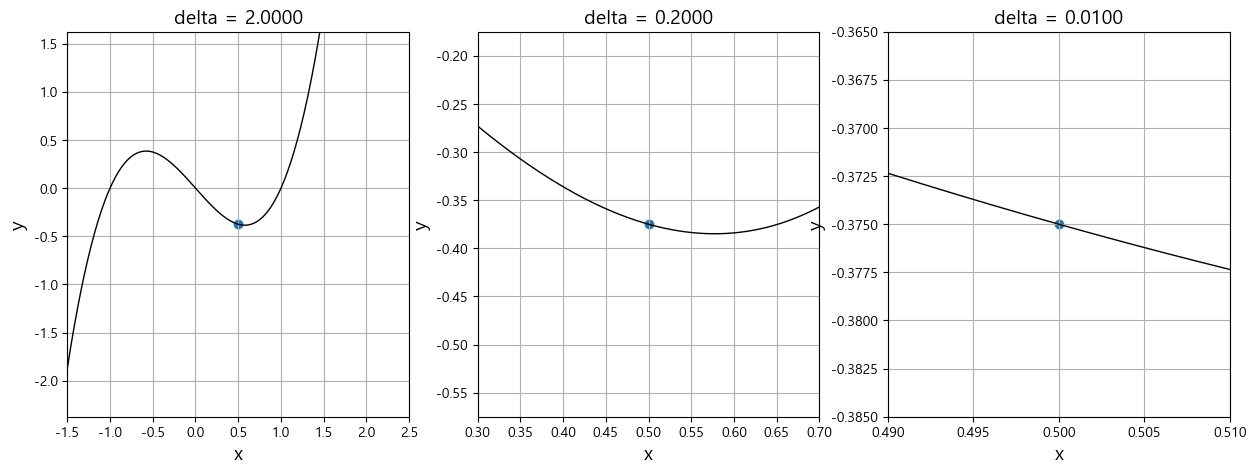

In [32]:
def f(x):
    return(x**3 - x)

plt.figure(figsize=(15, 5))
delta = [2.0, 0.2, 0.01]

x = np.linspace(0.5 - delta[0], 0.5 + delta[0], 200)
y = f(x)

plt.subplot(131)

plt.ylim(-3.0 / 8.0 - delta[0], -3.0 / 8.0 + delta[0])
plt.xlim(0.5 - delta[0], 0.5 + delta[0])
plt.plot(x, y, 'b-', lw=1, c = 'k')
plt.scatter([0.5], [-3.0 / 8.0])
plt.xlabel('x',fontsize = 14)
plt.ylabel('y',fontsize = 14)
plt.grid()
plt.title('delta = %.4f' % delta[0], fontsize = 14)


x = np.linspace(0.5-delta[1], 0.5 + delta[1], 200)
y = f(x)

plt.subplot(132)

plt.ylim(-3.0 / 8.0-delta[1], -3.0 / 8.0 + delta[1])
plt.xlim(0.5 - delta[1], 0.5 + delta[1])
plt.plot(x, y, 'b-', lw = 1, c = 'k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize = 14)
plt.ylabel('y',fontsize = 14)
plt.grid()
plt.title('delta = %.4f' % delta[1], fontsize=14)

x = np.linspace(0.5 - delta[2], 0.5 + delta[2], 200)
y = f(x)

plt.subplot(133)

plt.ylim(-3.0 / 8.0-delta[2], -3.0 / 8.0 + delta[2])
plt.xlim(0.5 - delta[2], 0.5 + delta[2])
plt.plot(x, y, 'b-', lw = 1, c = 'k')
plt.scatter([0.5], [-3.0 / 8.0])
plt.xlabel('x',fontsize = 14)
plt.ylabel('y',fontsize = 14)
plt.grid()
plt.title('delta = %.4f' % delta[2], fontsize = 14)

plt.show()

### 접선의 방정식

- 함수 f(x)에서 x의 값을 dx만큼 변화시켰을 때 f(x)의 변화량 (f(x+dx)-f(x))는 f'(x)dx와 같다.
- 미분 : y=f(x)라는 그래프상의 점(a,f(a))가 있을 때 그 점에서 그은 접선의 기울기는 f'(a)이며 a에서의 순간 변화율을 의미
- 적분 : 도함수 f'(x)의 하방 면적은 원 함수 f(x)의 y의 값이다. ex) f(x) = $x^2$

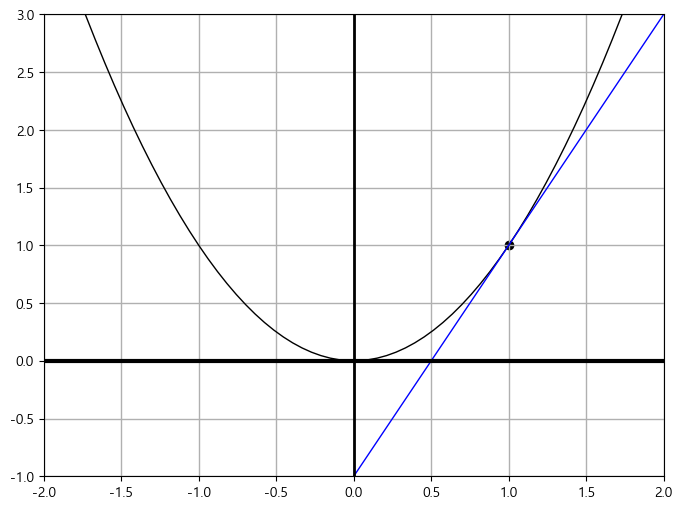

In [33]:
def f(x) : 
    
    return (x ** 2)

def g(x) :
    
    return(2 * x - 1)

x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize = (8, 6))

plt.scatter([1], [1], c = 'k')
plt.plot(x, f(x), 'b-', lw = '1', c = 'k')
plt.plot(x, g(x), 'b-', lw = '1', c = 'b')
plt.plot([x.min(), x.max()], [0, 0], lw = 3, c = 'k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw = 2, c = 'k')

plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.grid(lw = 1)

plt.show()

In [34]:
print(derivative(f, 1, dx = 1e-6))
print(derivative(f, 1.5, dx = 1e-6))

2.000000000002
2.9999999997532


### 편미분

- 다변수 함수에서 한 변수를 제외한 나머지 변수들의 값을 고정하고(상수 처리) 해당 변수의 변화에 따른 함수값의 변화량을 나타내는 개념

In [35]:
import sympy

sympy.init_printing(use_latex = 'mathjax')

x = sympy.symbols('x')

x

x

In [36]:
x,y = sympy.symbols('x, y')

f = x ** 2 + 4 * x * y + 4 * y ** 2

f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [37]:
# diff() 함수로 미분 변수 상수를 구분하기 위하여 편미분인 것처럼 입력 변수 지정

sympy.diff(f, x)

2⋅x + 4⋅y

In [38]:
sympy.diff(f, y)

4⋅x + 8⋅y